✓ CSV file loaded successfully!

Dataset shape: (30, 2)

First few rows:
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

Column names: ['YearsExperience', 'Salary']

Data types:
YearsExperience    float64
Salary             float64
dtype: object

Missing values:
YearsExperience    0
Salary             0
dtype: int64

TRAINING & TESTING SPLIT
Training samples: 21
Testing samples: 9

LINEAR REGRESSION MODEL - SALARY PREDICTION

Regression Equation: Salary = 26777.39 + 9360.26 × YearsExperience

Model Coefficient (Slope): 9360.26
Model Intercept: 26777.39

------------------------------------------------------------
MODEL PERFORMANCE METRICS
------------------------------------------------------------
Training R² Score: 0.9424
Testing R² Score: 0.9741
Mean Absolute Error (MAE): $3,737.42
Mean Squared Error (MSE): $23,370,078.80
Root Mean Squared Error (RMSE): $4,834.26


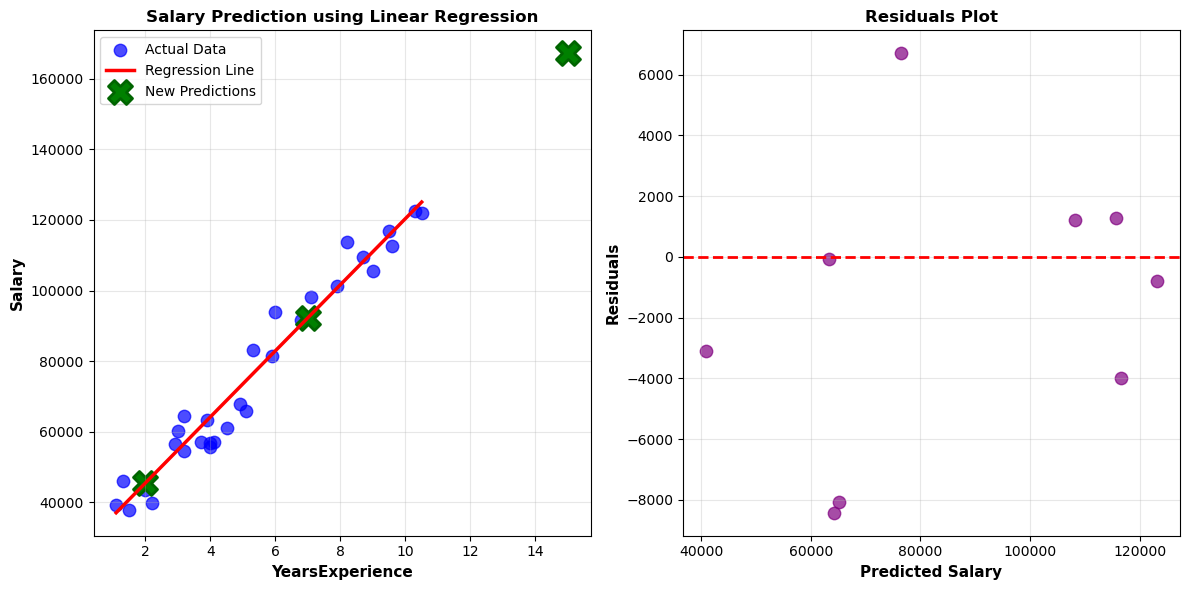


✓ Results saved to 'salary_prediction_results.txt'


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Load data from CSV file
try:
    df = pd.read_csv('Salary_Data.csv')
    print("✓ CSV file loaded successfully!")
    print(f"\nDataset shape: {df.shape}")
    print(f"\nFirst few rows:\n{df.head()}")
except FileNotFoundError:
    print("Error: 'salary_data.csv' not found. Please ensure the file exists.")
    exit()

# Display dataset information
print(f"\nColumn names: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()}")

# Handle missing values
df = df.dropna()

# Define features and target
# Adjust column names based on your CSV file
feature_column = 'YearsExperience'  # Change to your feature column name
target_column = 'Salary'             # Change to your target column name

# Check if columns exist
if feature_column not in df.columns or target_column not in df.columns:
    print(f"\nError: Column '{feature_column}' or '{target_column}' not found.")
    print(f"Available columns: {df.columns.tolist()}")
    exit()

X = df[[feature_column]].values
y = df[target_column].values

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(f"\n" + "=" * 60)
print("TRAINING & TESTING SPLIT")
print("=" * 60)
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_test)

# Print results
print("\n" + "=" * 60)
print("LINEAR REGRESSION MODEL - SALARY PREDICTION")
print("=" * 60)
print(f"\nRegression Equation: Salary = {model.intercept_:.2f} + {model.coef_[0]:.2f} × {feature_column}")
print(f"\nModel Coefficient (Slope): {model.coef_[0]:.2f}")
print(f"Model Intercept: {model.intercept_:.2f}")
print(f"\n" + "-" * 60)
print("MODEL PERFORMANCE METRICS")
print("-" * 60)
print(f"Training R² Score: {train_r2:.4f}")
print(f"Testing R² Score: {test_r2:.4f}")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Mean Squared Error (MSE): ${mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")

# Make predictions for new data
print("\n" + "=" * 60)
print("PREDICTIONS FOR NEW DATA")
print("=" * 60)
new_values = np.array([[2], [7], [15]])
predictions = model.predict(new_values)

print(f"\n{feature_column:<20} | Predicted {target_column}")
print("-" * 40)
for val, pred_salary in zip(new_values.flatten(), predictions):
    print(f"{val:<20} | ${pred_salary:,.2f}")

# Visualize the results
plt.figure(figsize=(12, 6))

# Plot 1: Scatter plot with regression line
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', label='Actual Data', s=80, alpha=0.7)
plt.plot(X, model.predict(X), color='red', linewidth=2.5, label='Regression Line')
plt.scatter(new_values, predictions, color='green', marker='X', s=300, label='New Predictions', edgecolors='darkgreen', linewidth=2)
plt.xlabel(feature_column, fontsize=11, fontweight='bold')
plt.ylabel(target_column, fontsize=11, fontweight='bold')
plt.title('Salary Prediction using Linear Regression', fontsize=12, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Plot 2: Residuals plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred_test
plt.scatter(y_pred_test, residuals, color='purple', s=80, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Salary', fontsize=11, fontweight='bold')
plt.ylabel('Residuals', fontsize=11, fontweight='bold')
plt.title('Residuals Plot', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Save model results to a file
with open('salary_prediction_results.txt', 'w') as f:
    f.write("LINEAR REGRESSION MODEL - SALARY PREDICTION\n")
    f.write("=" * 60 + "\n\n")
    f.write(f"Regression Equation: Salary = {model.intercept_:.2f} + {model.coef_[0]:.2f} × {feature_column}\n\n")
    f.write(f"Model Coefficient: {model.coef_[0]:.2f}\n")
    f.write(f"Model Intercept: {model.intercept_:.2f}\n\n")
    f.write(f"Training R² Score: {train_r2:.4f}\n")
    f.write(f"Testing R² Score: {test_r2:.4f}\n")
    f.write(f"Mean Absolute Error: ${mae:,.2f}\n")
    f.write(f"RMSE: ${rmse:,.2f}\n")

print("\n✓ Results saved to 'salary_prediction_results.txt'")